# Lesson 9 Mini Project
Computer Programming I

University of Uppsala

Fall 2020

Anders Jakobsson

## Importing data
First part of assignment is a function `load_csv(filename)` that takes a string filename as argument and returns a dictionary that takes the country code (all in the lowercases) as the key and the list of yearly CO2 emission history as the value.
Added extraction of time period from first line that will return a list of years (str) as second value. `load_cs` is found in 'csv_utils.py'.

The second part of assignment needs a function `intersection(list_1, list_2)` that returns a list with elements found in both lists.
`intersection` is found in `list_utils.py`.

The `blackcellmagic` extension is loaded just to be able to use the `black`formatter in notebook cells.

In [1]:
!cat csv_utils.py
!cat list_utils.py
%load_ext blackcellmagic

# src/uu_prog1/csv_utils.py

import csv


def load_csv(filename):
    """
    Takes a string filename as argument and returns a dictionary
    with the country code (lowercase) as key and the list of
    yearly CO2 emission history as value and a list with period names.
    File is CO2Emissions_filtered.csv. First row is header.
    Fields are country_name, country_code, indicator_name and
    then years from 1960 to 2014. Data from col 3 with first col 0.
    """
    d = dict()
    with open(filename) as csv_file:
        reader = csv.reader(csv_file)
        for index, line in enumerate(reader):
            if index != 0:
                d[line[1].lower()] = list(map(float, line[3:]))
            else:
                period = line[3:]
    return d, period
# src/uu_prog1/list_utils.py


def intersection(list_1, list_2):
    return [item for item in list_1 if item in list_2]


In [2]:
import matplotlib.pyplot as plt
import csv_utils

co2_f = "./data/CO2Emissions_filtered.csv"

co2_dict, co2_period = csv_utils.load_csv(co2_f)

Change default size of charts and pick Nordic countries for first charts.

In [3]:
plt.rcParams["figure.figsize"] = [12, 8]
subset = ["dnk", "fin", "isl", "nor", "swe"]

Create first chart with raw data from `co2_dict`

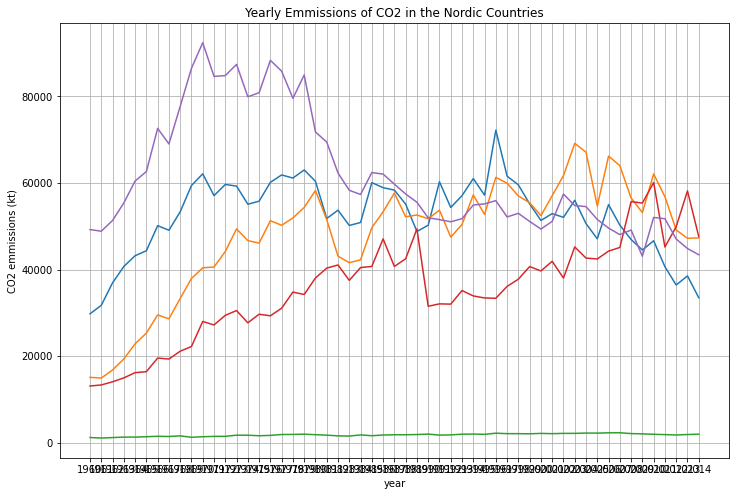

In [4]:
fig, ax = plt.subplots()
for cntry in subset:
    ax.plot(co2_period, co2_dict[cntry])

ax.set(
    xlabel="year",
    ylabel="CO2 emissions (kt)",
    title="Yearly Emissions of CO2 in the Nordic Countries",
)

ax.grid()

plt.show()

For second chart smoothing is introduced through functions `smooth_a` and `smooth_b` from earlier assignment.


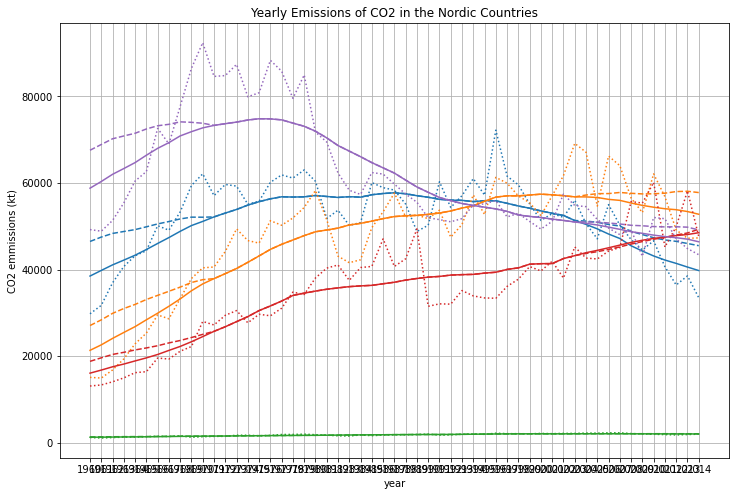

In [5]:
from mov_avg import smooth_a, smooth_b

col_list = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
]  # list of colors just to make sure use same color for every series fo a country
fig, ax = plt.subplots()
for col, cntry in enumerate(subset):
    ax.plot(co2_period, co2_dict[cntry], linestyle="dotted", color=col_list[col])
    ax.plot(
        co2_period,
        smooth_a(co2_dict[cntry], 11),
        linestyle="solid",
        color=col_list[col],
    )
    ax.plot(
        co2_period,
        smooth_b(co2_dict[cntry], 11),
        linestyle="dashed",
        color=col_list[col],
    )


ax.set(
    xlabel="year",
    ylabel="CO2 emissions (kt)",
    title="Yearly Emissions of CO2 in the Nordic Countries",
)

ax.grid()
plt.show()

Next charting of some LatAm countries population. This set is longer than the CO2 data.

In [6]:
population_f = "./data/population.csv"

pop_dict, pop_period = csv_utils.load_csv(population_f)
pop_subset = ["bol", "ven", "chl", "ecu", "pry"]

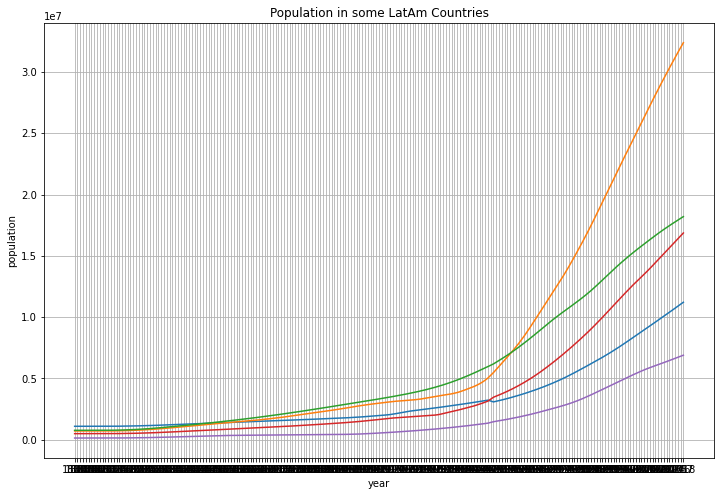

In [7]:
fig, ax = plt.subplots()
for cntry in pop_subset:
    ax.plot(pop_period, pop_dict[cntry])

ax.set(
    xlabel="year",
    ylabel="population",
    title="Population in some LatAm Countries",
)

ax.grid()

plt.show()

Next time for a 2014 chart on CO2 emissions vs poulation.

In [8]:
from list_utils import intersection

Simple test from assignment text for the `intersection`function

In [9]:
intersection(['fra', 'deu', 'ita', 'nld', 'lux'], ['bel', 'ita', 'fra', 'nld'])

['fra', 'ita', 'nld']

Have a look at the intersection of `pop_dict` and `co2_dict`, should be 141 according to assignment.

In [10]:
ctry_selection = intersection(pop_dict.keys(), co2_dict.keys())
len(ctry_selection)

141

Charting co2 vs pop 2014

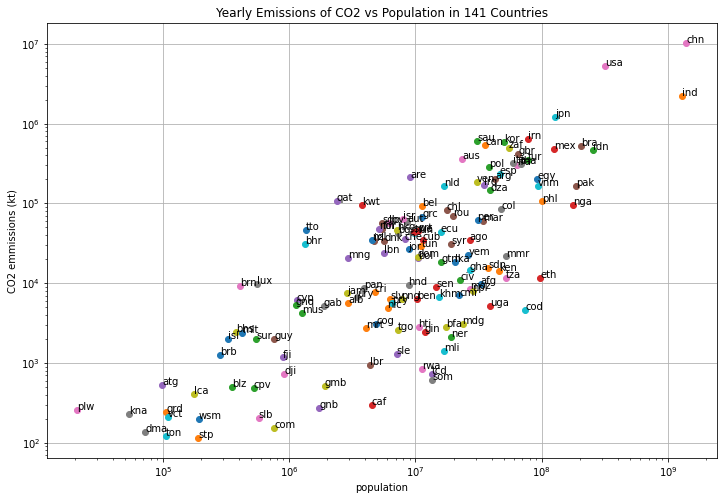

In [11]:
co2_index = co2_period.index("2014")
pop_index = pop_period.index("2014")

fig, ax = plt.subplots()
for ctry in ctry_selection:
    ax.loglog(pop_dict[ctry][pop_index], co2_dict[ctry][co2_index], "o")
    ax.annotate(ctry,(pop_dict[ctry][pop_index], co2_dict[ctry][co2_index]))

ax.set(
    xlabel="population",
    ylabel="CO2 emissions (kt)",
    title=f"Yearly Emissions of CO2 vs Population in {len(ctry_selection)} Countries",
)

ax.grid()

plt.show()